###Name: William C Francis
###Penn Email: willcf@seas.upenn.edu

# Solution 1

##(c):
###Data Preparation

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from skimage.filters import gabor_kernel, gabor
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm, metrics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
ds = fetch_openml('mnist_784')
x, y = ds.data, ds.target
y=y.astype(int)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


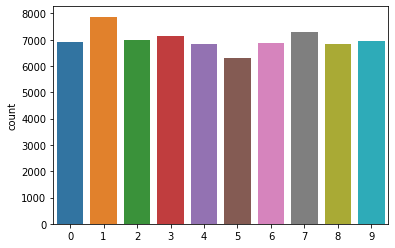

In [2]:
sns.countplot(y) #visualizing the distribution of each class

####We can see that the different classes have different number of samples. Let us use undersampling to make sure that each class have equal number of samples

In [3]:
rus = RandomUnderSampler()
x, y = rus.fit_resample(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


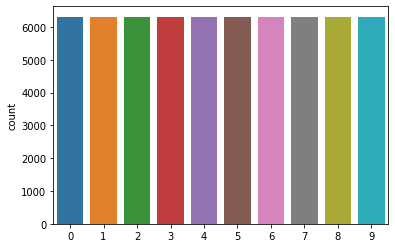

In [4]:
sns.countplot(y)

####The undersampled dataset has equal number of samples in each class

####Creating training (80%) and validation (20%) datasets from x and y

In [5]:
x_train, x_val, y_train, y_val = train_test_split(x, y,
                    test_size=0.2, random_state=42)

####Understanding the dataset

In [6]:
print(ds, x, y, "\n \n", x_train, x_val, x_train.shape, y_train, y_val, y_train.shape)

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object), 'frame': None, 'feature_names': ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60

In [7]:
print(x_train.shape)
print(ds.keys())
print(ds['target'])

(50504, 784)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])
['5' '0' '4' ... '4' '5' '6']


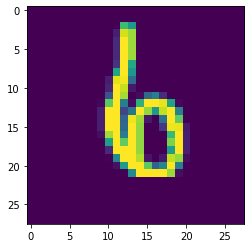

In [8]:
a = x_train[0].reshape((28,28)) 
plt.imshow(a)

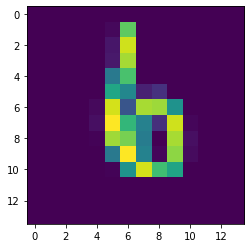

In [9]:
import cv2
b = cv2.resize(a, (14,14)) 
plt.imshow(b)

#####Down-sampling the entire x_train

In [10]:
r,c = x_train.shape
x1_train = np.zeros([r,14*14])
for i in range(r):
  a = x_train[i].reshape((28,28)) 
  b = cv2.resize(a, (14,14)) 
  c = b.flatten()
  x1_train[i] = c

#####Visualizing a random image from the downsampled x1_train

9 (50504, 196)


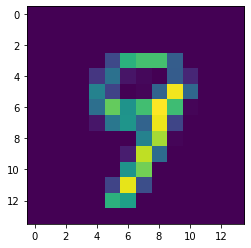

In [11]:
a = x1_train[1233].reshape((14,14)) 
plt.imshow(a)
print(y_train[1233], x1_train.shape)

#####Down-sampling the entire x_val

In [12]:
r,c = x_val.shape
x1_val = np.zeros([r,14*14])
for i in range(r):
  a = x_val[i].reshape((28,28)) 
  b = cv2.resize(a, (14,14)) 
  c = b.flatten()
  x1_val[i] = c

#####Visualizing a random image from the downsampled x1_val

7 (12626, 196)


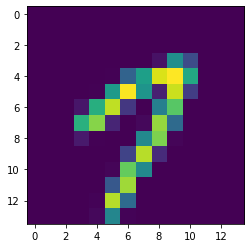

In [13]:
a = x1_val[5242].reshape((14,14)) 
plt.imshow(a)
print(y_val[5242], x1_val.shape)

##(d):

#####Fitting the SVM on validation set

In [14]:
classifier = svm.SVC(C=1.0, kernel='rbf', gamma='scale')
classifier.fit(x1_train, y_train)
predicted = classifier.predict(x1_val)

In [15]:
print(predicted)

[2 0 3 ... 4 1 1]


#####Validation accuracy

In [16]:
print(metrics.classification_report(y_val, predicted))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1217
           1       0.99      0.99      0.99      1286
           2       0.98      0.98      0.98      1257
           3       0.98      0.97      0.97      1183
           4       0.97      0.97      0.97      1304
           5       0.97      0.98      0.97      1217
           6       0.98      0.98      0.98      1309
           7       0.98      0.97      0.98      1233
           8       0.98      0.97      0.98      1308
           9       0.97      0.96      0.96      1312

    accuracy                           0.98     12626
   macro avg       0.98      0.98      0.98     12626
weighted avg       0.98      0.98      0.98     12626



#####Confusion Matrix

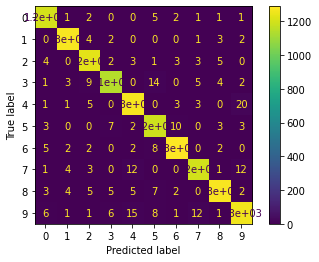

In [17]:
conf = metrics.plot_confusion_matrix(classifier, x1_val, y_val)

In [18]:
r,c = x_train.shape
nsup = classifier.n_support_ #number of support vectors for each class
print(sum(nsup))
print("Ratio = ", sum(nsup)/r)

9701
Ratio =  0.19208379534294312


##(g):

#####Performing grid search over different values of C

In [19]:
params = {'C': [0.1, 1, 10, 50, 100]} 
grid_s = GridSearchCV(classifier, params, refit = True, verbose = 3)
grid_s.fit(x1_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................... C=0.1, score=0.957, total= 4.3min
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.3min remaining:    0.0s


[CV] ............................... C=0.1, score=0.955, total= 4.2min
[CV] C=0.1 ...........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  8.5min remaining:    0.0s


[CV] ............................... C=0.1, score=0.957, total= 4.2min
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.953, total= 4.2min
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.955, total= 4.2min
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.975, total= 1.9min
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.978, total= 1.9min
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.977, total= 1.9min
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.977, total= 1.9min
[CV] C=1 .............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 54.0min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 50, 100]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=3)

#####Printing the best value of C and the classification report

In [20]:
print(grid_s.best_params_)
gpred = grid_s.predict(x1_val)
print(classification_report(y_val, gpred)) 

{'C': 10}
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1217
           1       0.99      1.00      0.99      1286
           2       0.98      0.99      0.98      1257
           3       0.99      0.97      0.98      1183
           4       0.98      0.99      0.98      1304
           5       0.97      0.98      0.98      1217
           6       0.99      0.99      0.99      1309
           7       0.99      0.98      0.98      1233
           8       0.99      0.98      0.98      1308
           9       0.97      0.97      0.97      1312

    accuracy                           0.98     12626
   macro avg       0.98      0.98      0.98     12626
weighted avg       0.98      0.98      0.98     12626



#####The best C value is 10

#####Accuracies of all five C values

In [21]:
c = [0.1, 1, 10, 50, 100]
for i in c:
  classifier = svm.SVC(C=i, kernel='rbf', gamma='scale')
  classifier.fit(x1_train, y_train)
  predicted = classifier.predict(x1_val)
  print(classification_report(y_val, predicted)) 

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1217
           1       0.97      0.98      0.98      1286
           2       0.96      0.96      0.96      1257
           3       0.95      0.94      0.94      1183
           4       0.95      0.96      0.95      1304
           5       0.94      0.96      0.95      1217
           6       0.96      0.97      0.97      1309
           7       0.96      0.95      0.96      1233
           8       0.96      0.94      0.95      1308
           9       0.94      0.93      0.93      1312

    accuracy                           0.96     12626
   macro avg       0.96      0.96      0.96     12626
weighted avg       0.96      0.96      0.96     12626

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1217
           1       0.99      0.99      0.99      1286
           2       0.98      0.98      0.98      1257
           3       0.98 

##(h):

#####Creating new training and validation sets with 50 images per digit

In [22]:
rus = RandomUnderSampler(sampling_strategy={0:50,1:50,2:50,3:50,4:50,5:50,6:50,7:50,8:50,9:50})
x2_train, y2_train = rus.fit_resample(x1_train, y_train)
x2_val, y2_val = rus.fit_resample(x1_val, y_val)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [23]:
print(x2_train.shape,y2_train.shape,x2_val.shape,y2_val.shape)

(500, 196) (500,) (500, 196) (500,)


#####Applying Gabor filter on a single image from the training set

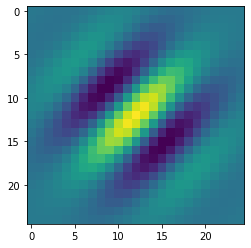

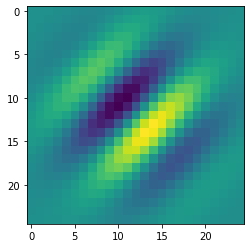

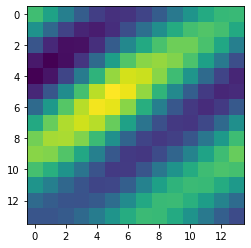

In [24]:
freq, theta, bandwidth = 0.1, np.pi/4, 1
gk = gabor_kernel(frequency=freq, theta=theta, bandwidth=bandwidth)
plt.figure(1); plt.clf(); plt.imshow(gk.real)
plt.figure(2); plt.clf(); plt.imshow(gk.imag)
image = x2_train[0].reshape((14,14))
coeff_real, _ = gabor(image, frequency=freq, theta=theta,
                    bandwidth=bandwidth)
plt.figure(3); plt.clf(); plt.imshow(coeff_real)

#####Filter bank

In [25]:
theta = np.arange(0,np.pi,np.pi/4)
frequency = np.arange(0.05,0.5,0.15)
bandwidth = np.arange(0.3,1,0.3)

#####Applying the filter bank on the images and creating a new dataset

In [26]:
x_traingb = np.zeros((500, 36, 196))
x_valgb = np.zeros((500, 36, 196))
count = -1
for i in theta:
  for j in frequency:
    for k in bandwidth:
      count += 1
      for m in range(500):
        print("\n theta = ", i, " freq = ", j," bandw = ", k, "| ", m)
        imgt = x2_train[m].reshape((14,14))
        imgv = x2_val[m].reshape((14,14))
        coeff_realt, _ = gabor(imgt, frequency=j, theta=i,
                    bandwidth=k)
        coeff_realv, _ = gabor(imgv, frequency=j, theta=i,
                    bandwidth=k)
        x_traingb[m][count] = coeff_realt.flatten()
        x_valgb[m][count] = coeff_realv.flatten()

x_traingb = x_traingb.reshape(500, -1)
x_valgb = x_valgb.reshape(500, -1)

Streaming output truncated to the last 5000 lines.

 theta =  2.356194490192345  freq =  0.2  bandw =  0.6 |  0

 theta =  2.356194490192345  freq =  0.2  bandw =  0.6 |  1

 theta =  2.356194490192345  freq =  0.2  bandw =  0.6 |  2

 theta =  2.356194490192345  freq =  0.2  bandw =  0.6 |  3

 theta =  2.356194490192345  freq =  0.2  bandw =  0.6 |  4

 theta =  2.356194490192345  freq =  0.2  bandw =  0.6 |  5

 theta =  2.356194490192345  freq =  0.2  bandw =  0.6 |  6

 theta =  2.356194490192345  freq =  0.2  bandw =  0.6 |  7

 theta =  2.356194490192345  freq =  0.2  bandw =  0.6 |  8

 theta =  2.356194490192345  freq =  0.2  bandw =  0.6 |  9

 theta =  2.356194490192345  freq =  0.2  bandw =  0.6 |  10

 theta =  2.356194490192345  freq =  0.2  bandw =  0.6 |  11

 theta =  2.356194490192345  freq =  0.2  bandw =  0.6 |  12

 theta =  2.356194490192345  freq =  0.2  bandw =  0.6 |  13

 theta =  2.356194490192345  freq =  0.2  bandw =  0.6 |  14

 theta =  2.356194490192345 

#####Plotting the filter bank

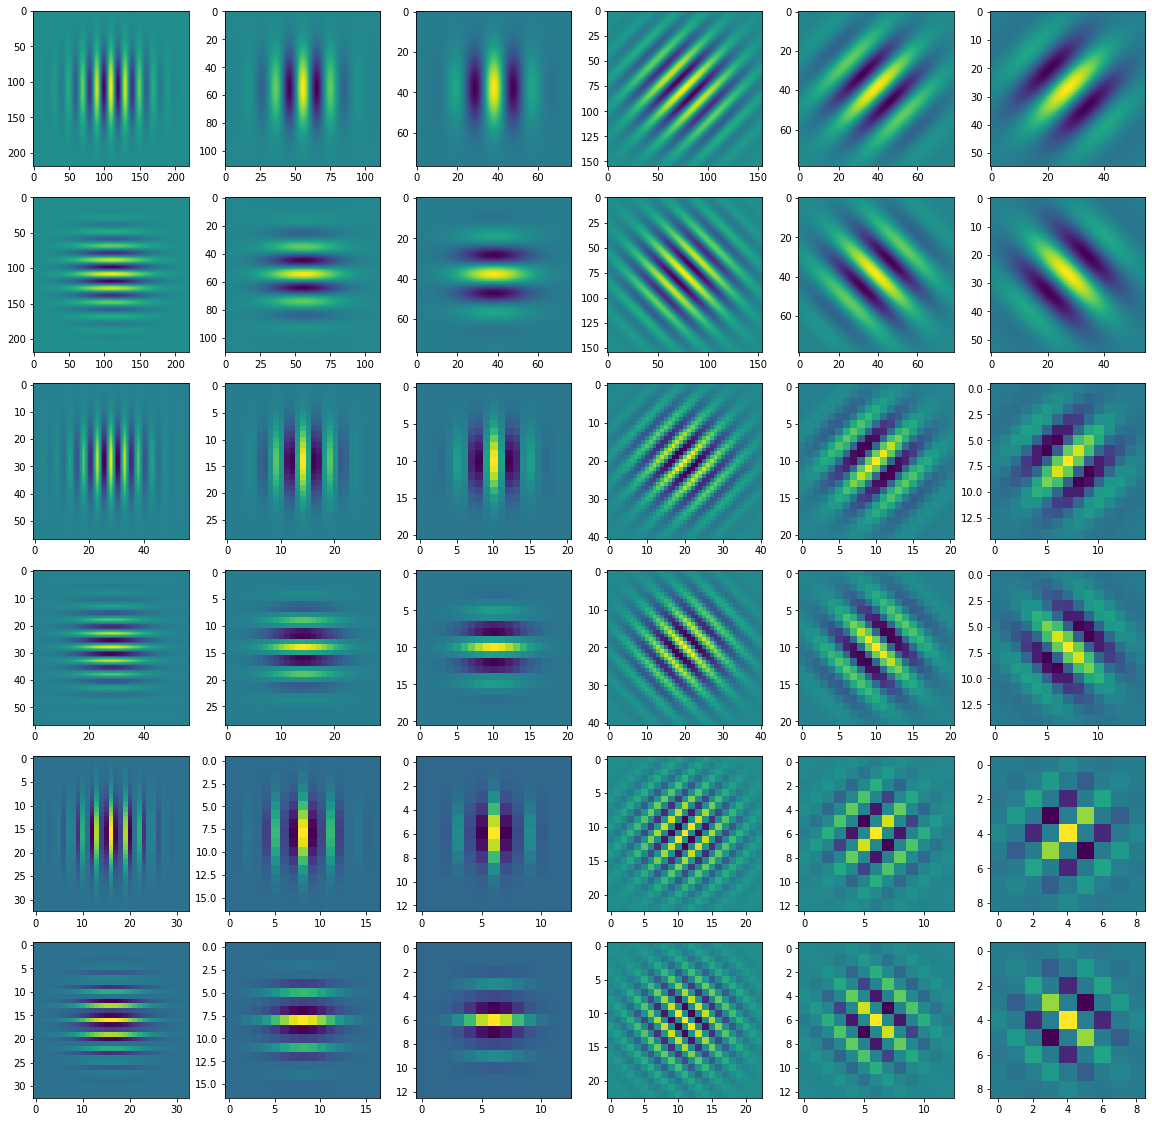

In [27]:
count=0
plt.figure(figsize=(20,20))
for i in frequency:
  for j in theta:
    for k in bandwidth:
      count+=1
      plt.subplot(6,6,count)
      gk = gabor_kernel(frequency=i, theta=j, bandwidth=k)
      plt.imshow(gk.real)


In [28]:
x_traingb.shape

(500, 7056)

#####Fitting the new training set with SVM and finding the validation accuracy

In [29]:
classifier = svm.SVC(C=10, kernel='rbf', gamma='scale')
classifier.fit(x_traingb, y2_train)
predicted = classifier.predict(x_valgb)
predicted.shape

(500,)

#####Validation accuracy after applying 36 Gabor filters

In [30]:
print(metrics.classification_report(y2_val, predicted))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        50
           1       0.96      1.00      0.98        50
           2       0.88      0.84      0.86        50
           3       0.96      0.90      0.93        50
           4       0.89      0.84      0.87        50
           5       0.80      0.94      0.86        50
           6       0.90      0.92      0.91        50
           7       0.88      0.92      0.90        50
           8       0.82      0.66      0.73        50
           9       0.85      0.92      0.88        50

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500



Validation accuracy = 89%




#####Plotting the confusion matrix

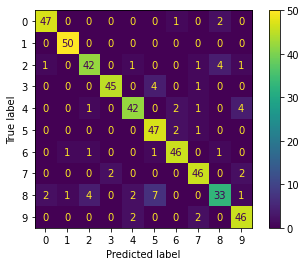

In [31]:
conf = metrics.plot_confusion_matrix(classifier, x_valgb, y2_val)

#####Training accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        50
           5       1.00      1.00      1.00        50
           6       1.00      1.00      1.00        50
           7       1.00      1.00      1.00        50
           8       1.00      1.00      1.00        50
           9       1.00      1.00      1.00        50

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



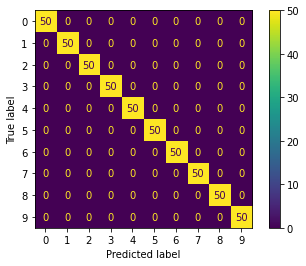

In [32]:
predicted = classifier.predict(x_traingb)
print(metrics.classification_report(y2_train, predicted))
conf = metrics.plot_confusion_matrix(classifier, x_traingb, y2_train)

Training Accuracy = 100%

#####Scaling down the data to the range between 0 and 1 before using PCA

In [33]:
scaler = MinMaxScaler()
x2_trainsc = scaler.fit_transform(x2_train)
x2_valsc = scaler.fit_transform(x2_val)

#####Applying PCA to reduce dimensionality

In [42]:
pca = PCA(n_components = 169) 
pca.fit(x2_trainsc)
x3_train = pca.transform(x2_trainsc)
pca.fit(x2_valsc)
x3_val = pca.transform(x2_valsc)

In [43]:
print(x3_train.shape, x3_val.shape)

(500, 169) (500, 169)


#####Creating the new dataset with increased number of Gabor Filters

In [44]:
theta = np.arange(np.pi/4,np.pi,np.pi/6)
frequency = np.arange(0.05,0.2,0.1)
bandwidth = np.arange(0.5,2.1,0.2)

In [45]:
x_traingb = np.zeros((500, 80, 169))
x_valgb = np.zeros((500, 80, 169))
count = -1
for i in theta:
  for j in frequency:
    for k in bandwidth:
      count += 1
      for m in range(500):
        print("\n theta = ", i, " freq = ", j," bandw = ", k, "| ", m)
        imgt = x3_train[m].reshape((13,13))
        imgv = x3_val[m].reshape((13,13))
        coeff_realt, _ = gabor(imgt, frequency=j, theta=i,
                    bandwidth=k)
        coeff_realv, _ = gabor(imgv, frequency=j, theta=i,
                    bandwidth=k)
        x_traingb[m][count] = coeff_realt.flatten()
        x_valgb[m][count] = coeff_realv.flatten()

x_traingb = x_traingb.reshape(500, -1)
x_valgb = x_valgb.reshape(500, -1)

Streaming output truncated to the last 5000 lines.

 theta =  2.879793265790643  freq =  0.15000000000000002  bandw =  1.0999999999999999 |  0

 theta =  2.879793265790643  freq =  0.15000000000000002  bandw =  1.0999999999999999 |  1

 theta =  2.879793265790643  freq =  0.15000000000000002  bandw =  1.0999999999999999 |  2

 theta =  2.879793265790643  freq =  0.15000000000000002  bandw =  1.0999999999999999 |  3

 theta =  2.879793265790643  freq =  0.15000000000000002  bandw =  1.0999999999999999 |  4

 theta =  2.879793265790643  freq =  0.15000000000000002  bandw =  1.0999999999999999 |  5

 theta =  2.879793265790643  freq =  0.15000000000000002  bandw =  1.0999999999999999 |  6

 theta =  2.879793265790643  freq =  0.15000000000000002  bandw =  1.0999999999999999 |  7

 theta =  2.879793265790643  freq =  0.15000000000000002  bandw =  1.0999999999999999 |  8

 theta =  2.879793265790643  freq =  0.15000000000000002  bandw =  1.0999999999999999 |  9

 theta =  2.879793265790643 

#####Plotting the new Gabor filter bank

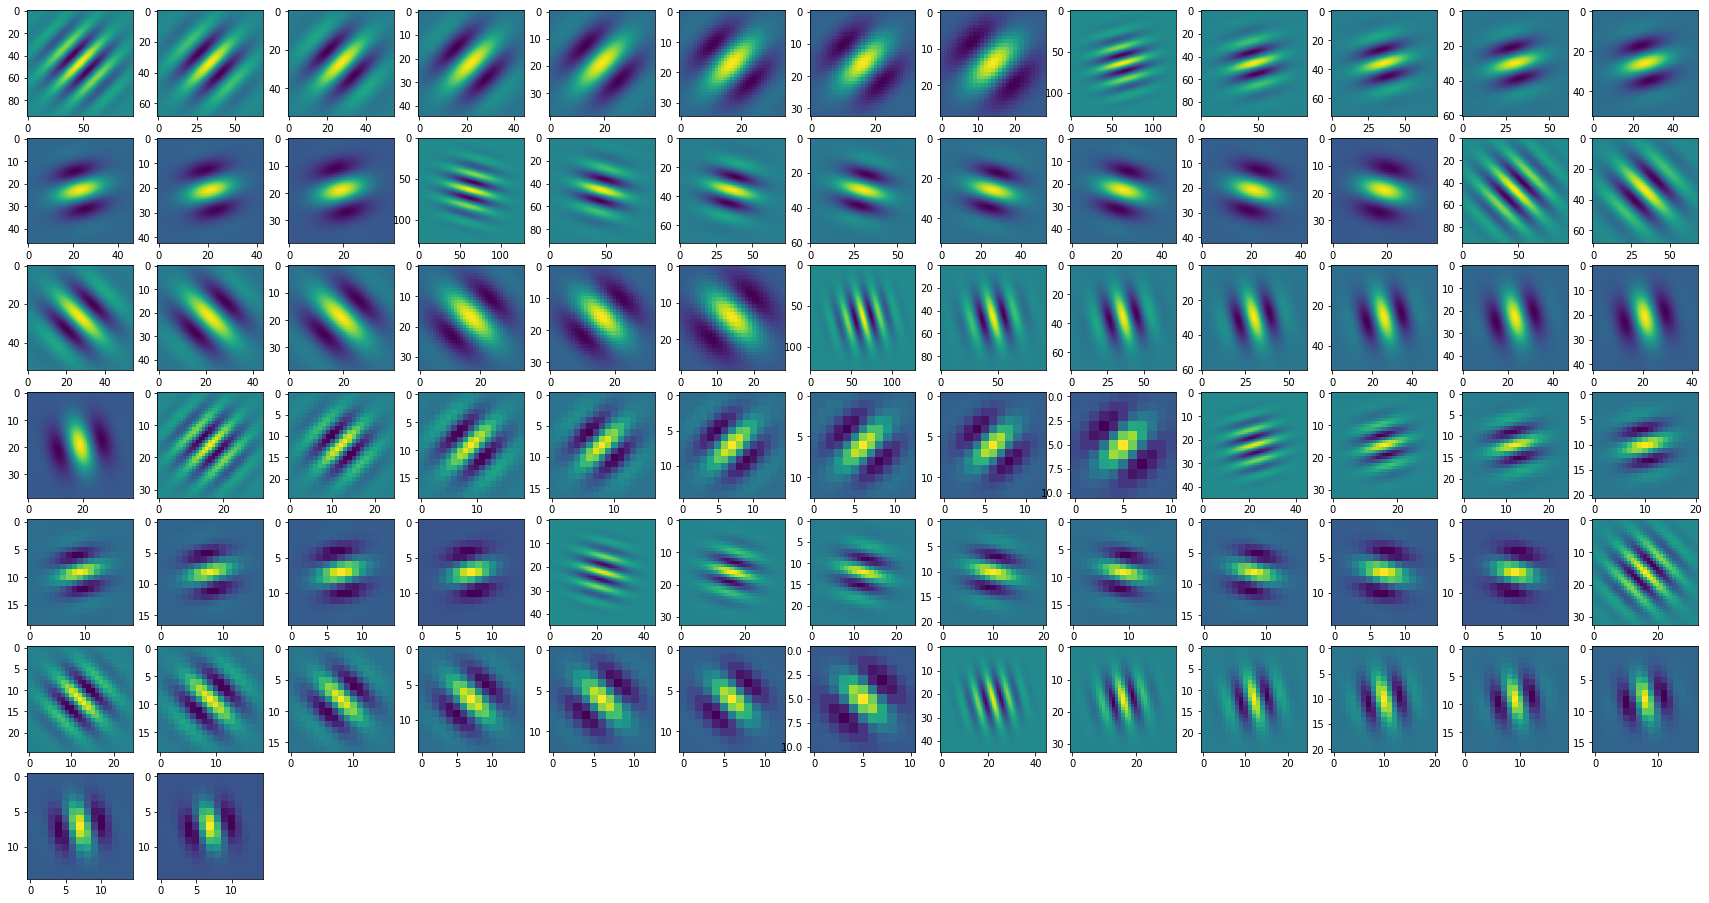

In [55]:
count=0
plt.figure(figsize=(30,30))
for i in frequency:
  for j in theta:
    for k in bandwidth:
      count+=1
      plt.subplot(13,13,count)
      gk = gabor_kernel(frequency=i, theta=j, bandwidth=k)
      plt.imshow(gk.real)

#####Fitting the SVM with new Gabor filtered images

In [51]:
classifier = svm.SVC(C=10, kernel='rbf', gamma='scale')
classifier.fit(x_traingb, y2_train)
predicted = classifier.predict(x_valgb)
predicted.shape

(500,)

#####Validation Accuracy

              precision    recall  f1-score   support

           0       0.78      0.56      0.65        50
           1       0.04      0.02      0.03        50
           2       0.14      0.14      0.14        50
           3       0.23      0.22      0.22        50
           4       0.24      0.34      0.28        50
           5       0.21      0.24      0.23        50
           6       0.02      0.02      0.02        50
           7       0.21      0.28      0.24        50
           8       0.16      0.18      0.17        50
           9       0.05      0.04      0.04        50

    accuracy                           0.20       500
   macro avg       0.21      0.20      0.20       500
weighted avg       0.21      0.20      0.20       500



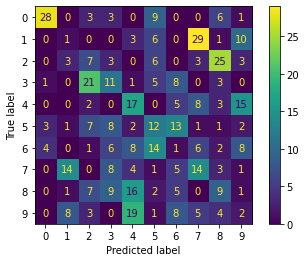

In [52]:
print(metrics.classification_report(y2_val, predicted))
conf = metrics.plot_confusion_matrix(classifier, x_valgb, y2_val)

#####Training Accuracy

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        50
           5       1.00      1.00      1.00        50
           6       1.00      1.00      1.00        50
           7       1.00      1.00      1.00        50
           8       1.00      1.00      1.00        50
           9       1.00      1.00      1.00        50

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



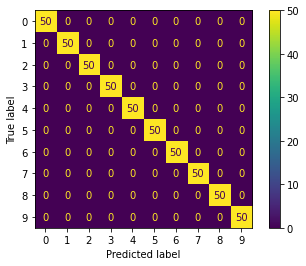

In [53]:
predicted = classifier.predict(x_traingb)
print(metrics.classification_report(y2_train, predicted))
conf = metrics.plot_confusion_matrix(classifier, x_traingb, y2_train)

### Thank you!